In [1]:
import tensorflow as tf
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### load model

In [2]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolov2.weights',
    'threshold' : 0.5    
}

tfnet = TFNet(options)

darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.072979927063s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  

In [4]:
img = cv2.imread('test_image/image1.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 917, 'y': 71},
  'confidence': 0.6599529,
  'label': 'car',
  'topleft': {'x': 761, 'y': 11}},
 {'bottomright': {'x': 951, 'y': 363},
  'confidence': 0.7466625,
  'label': 'car',
  'topleft': {'x': 857, 'y': 256}},
 {'bottomright': {'x': 1082, 'y': 387},
  'confidence': 0.7200088,
  'label': 'car',
  'topleft': {'x': 939, 'y': 266}},
 {'bottomright': {'x': 1188, 'y': 557},
  'confidence': 0.7215042,
  'label': 'truck',
  'topleft': {'x': 916, 'y': 401}},
 {'bottomright': {'x': 500, 'y': 856},
  'confidence': 0.5763351,
  'label': 'broccoli',
  'topleft': {'x': 38, 'y': 347}}]

### Example1: One picture for one bounding box 

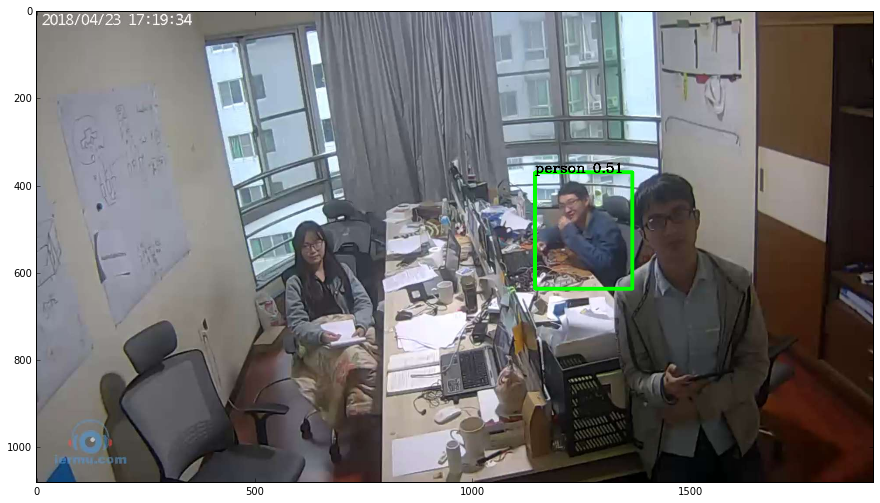

In [64]:
person1_br = (result[0]['bottomright']['x'],result[0]['bottomright']['y'])
person1_tl = (result[0]['topleft']['x'],result[0]['topleft']['y'])
person1_label = result[0]['label']+' '+str(round(result[0]['confidence'],2))

image = cv2.rectangle(img, person1_tl, person1_br, (0, 255, 0), 7)
# cv2.rectangle's parameters
# (0, 255,0) ------------------  color of rectangle,(0, 255, 0) is RGB value of green, 
# 7 ---------------------------  linewidth of rectangle

image = cv2.putText(image, person1_label, person1_tl ,cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2) 
# cv2.putText's parameters
# person1_tl ------------------  position of text
# cv2.FONT_HERSHEY_COMPLEX ----  font of text
# 2 ---------------------------  size of text
# (0,0,0) ---------------------  color of text
# 1 ---------------------------  width of text

plt.figure(figsize=(15,10))
plt.imshow(image)

image = Image.fromarray(image)
image.save('output.jpg')

### Example2: One picture for person of bounding box 

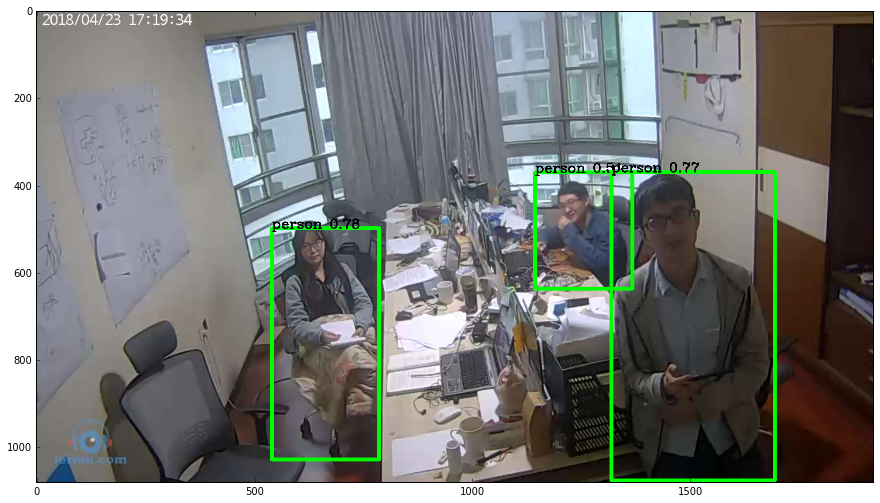

In [74]:
img = cv2.imread('test_image/image6.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for objecter in result:
    tl = (objecter['topleft']['x'], objecter['topleft']['y'])
    br = (objecter['bottomright']['x'], objecter['bottomright']['y'])
    label = objecter['label'] + ' ' + str(round(objecter['confidence'], 2))
    
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
    
plt.figure(figsize=(15,10))
plt.imshow(img)

### Example3: multiple picture for all of bounding box 

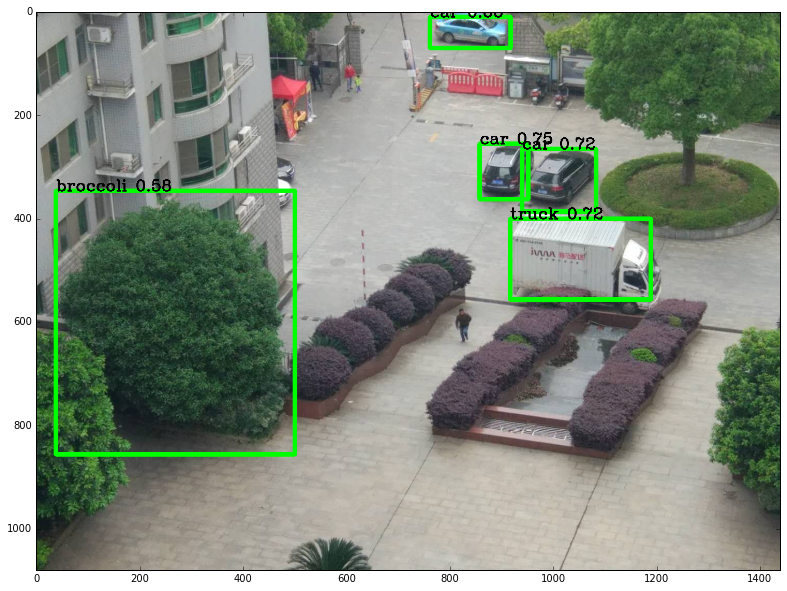

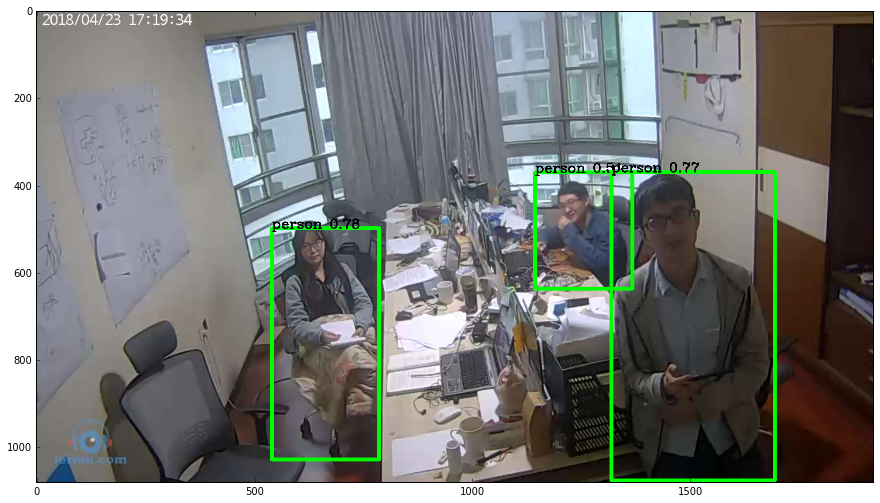

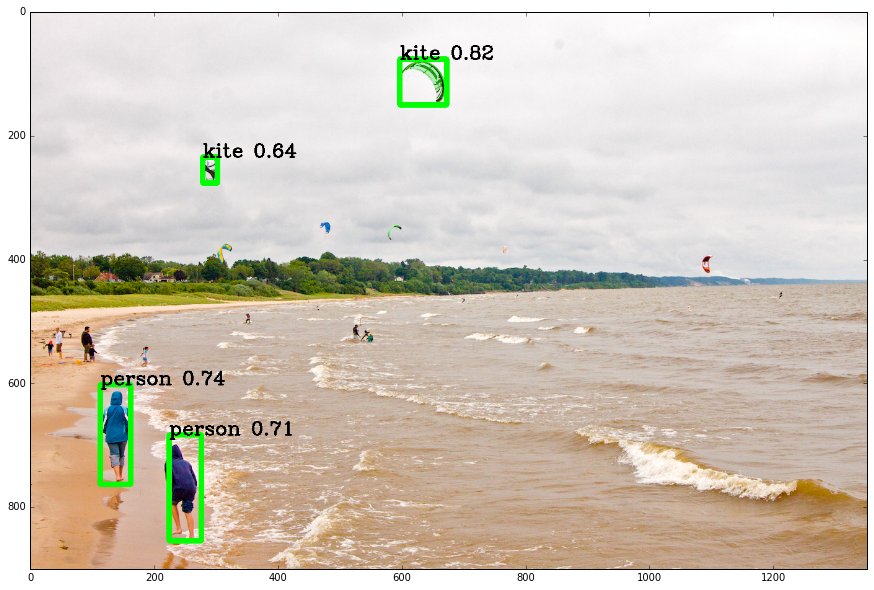

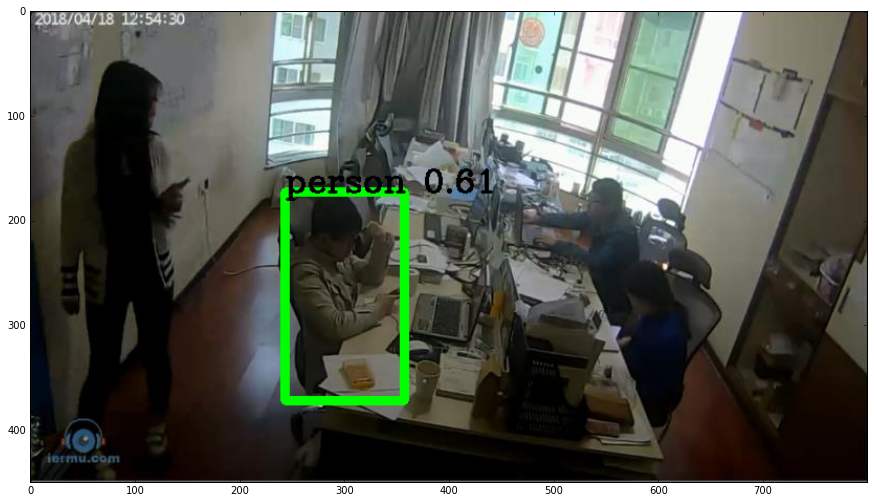

In [78]:
img_name_list = os.listdir('test_image')
for img_name in img_name_list: 
    img = cv2.imread('test_image/{}'.format(img_name), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = tfnet.return_predict(img)
    for objecter in result:
        tl = (objecter['topleft']['x'], objecter['topleft']['y'])
        br = (objecter['bottomright']['x'], objecter['bottomright']['y'])
        label = objecter['label'] + ' ' + str(round(objecter['confidence'], 2))
    
        img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
        img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
    
    plt.figure(figsize=(15,10))
    plt.imshow(img)